<div style="border:solid green 2px; padding: 20px">
<b>Hello, Ferdinand!</b>

Grigoriy is here again, I've reviewed your 6-th project.


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project! Well done, your code is correct, you can finish the project. Please, fix the charts and finalize your conclusions.

**Update**:<br>
Thank you for the update! Great job, your project has been accepted. Congratulations!

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>SHAP model explainer: <a>https://github.com/slundberg/shap</a></li>
        <li>Linear regression from scratch: <a>https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c</a></li>
        <li>Pandas profilier: <a>https://github.com/pandas-profiling/pandas-profiling</a></li>
    </ul>
</div>

---

# Project: Gym Chain (Forecasts and Predictions)

This project is about customer churn, which is one of the main problems of fitness chains. More precisely, we want to predict how likely it is that a customer will drop out and which characteristics favor this probability. In order to fight churn, Model Fitness has digitized a number of its customer profiles. The task is to analyze them and come up with a customer retention strategy. <br>
First, all necessary data and tools are imported. The data from a data logger that records user activity is available. In the next step, the data is preprocessed, dealing with missing values or incorrect data types, for example. <br>
After that, the data is divided into 2 groups, where one group has renewed the contract and the other has not. To do this, graphs are output to see trends in which properties are associated with the bounce rate. 
The next step is to create a model that predicts the bounce probability. In doing so, 2 different models are created, and the one with the more accurate results is selected.
This is followed by the creation of user clusters. With the help of a dendogram, the ideal number of clusters is to be determined. After the subdivision into the clusters, the bounce rates and other characteristics are compared with each other. Clusters with a high bounce probability are to be determined.
Finally, an overall conclusion will be drawn from the results obtained and strategy recommendations will be made.

## Importing data and tools

In this step, the necessary tools and available data are imported.

### Tools

The following tools are used in the project.

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import numpy as np
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage


### Data

The following open source data is available.

In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')

## Preprocessing of the data

In the pre-processing step, the following error sources are checked and corrected if necessary:

    - Duplicates
    - Missing values
    - Wrong data types
    - Irregular column names

### Duplicates

In this step, duplicates are eliminated (if any). The number of rows with and without duplicates is compared.

In [3]:
duplicate_count = len(data)-len(data.drop_duplicates())

print('Row count hypotheses with duplicates: {}'.format(len(data)))
print('Row count hypotheses without duplicates: {}'.format(len(data.drop_duplicates())))
print('Number of duplicates: {} ({:.2%})'.format(duplicate_count, duplicate_count / len(data)))

Row count hypotheses with duplicates: 4000
Row count hypotheses without duplicates: 4000
Number of duplicates: 0 (0.00%)


As you can see, there are 0 duplicate rows. No Duplicates are there to remove.

### Missing values

In this step the number of missing values in both data sets is determined. For this the method missing_data() is defined and applied. This counts the number of missing values for each column and outputs a result table.

In [4]:
# Function to count missing values for each columns in a DataFrame
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types

    return(np.transpose(temp))

In [5]:
missing_data(data)

gender Near_Location Partner Promo_friends  Phone Contract_period  \
Total           0             0       0             0      0               0   
Percent(%)      0             0       0             0      0               0   
Types       int64         int64   int64         int64  int64           int64   

           Group_visits    Age Avg_additional_charges_total  \
Total                 0      0                            0   
Percent(%)            0      0                            0   
Types             int64  int64                      float64   

           Month_to_end_contract Lifetime Avg_class_frequency_total  \
Total                          0        0                         0   
Percent(%)                     0        0                         0   
Types                    float64    int64                   float64   

           Avg_class_frequency_current_month  Churn  
Total                                      0      0  
Percent(%)                                 0      0  
Types                                float64  int64

There are no missing values. No further steps are necessary here.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Very informative table 👍
</div>

### Wrong data types

By applying the info() method was shown the data types of all records and their columns are determined. These are changed if necessary, in order to be able to carry out further steps without problems. Furthermore data types will be changed, if there is a way to optimize the store of the data to speed up calculating processes.

In [6]:
data.head(5)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


As you can see in the cell above, there are no incorrect data types. However, in some columns, depending on the respective value spectrum, one can perform optimizations. For this the method value_range() is defined and applied.

In [8]:
def value_range(data):
    for col in data.columns:
        print('Column name: {}, Min: {}, Max: {}'.format(col, data[col].min(), data[col].max()))
        print('-------------------------------------------')

In [9]:
value_range(data)

Column name: gender, Min: 0, Max: 1
-------------------------------------------
Column name: Near_Location, Min: 0, Max: 1
-------------------------------------------
Column name: Partner, Min: 0, Max: 1
-------------------------------------------
Column name: Promo_friends, Min: 0, Max: 1
-------------------------------------------
Column name: Phone, Min: 0, Max: 1
-------------------------------------------
Column name: Contract_period, Min: 1, Max: 12
-------------------------------------------
Column name: Group_visits, Min: 0, Max: 1
-------------------------------------------
Column name: Age, Min: 18, Max: 41
-------------------------------------------
Column name: Avg_additional_charges_total, Min: 0.1482047884566242, Max: 552.5907403868798
-------------------------------------------
Column name: Month_to_end_contract, Min: 1.0, Max: 12.0
-------------------------------------------
Column name: Lifetime, Min: 0, Max: 31
-------------------------------------------
Column name: 

In none of the columns is an int64 or float64 required. Therefore these are changed to int16 or float64 respectively. Therefore the method change_type will be defined and applied.

In [10]:
def change_type(data):
    for col in data.columns:
        
        col_type = data[col].dtypes
        
        if col_type == 'int64':
            data[col] = data[col].astype('int16')
            
        elif col_type == 'float64':
            data[col] = data[col].astype('float16')
            
    return data

In [11]:
change_type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int16
Near_Location                        4000 non-null int16
Partner                              4000 non-null int16
Promo_friends                        4000 non-null int16
Phone                                4000 non-null int16
Contract_period                      4000 non-null int16
Group_visits                         4000 non-null int16
Age                                  4000 non-null int16
Avg_additional_charges_total         4000 non-null float16
Month_to_end_contract                4000 non-null float16
Lifetime                             4000 non-null int16
Avg_class_frequency_total            4000 non-null float16
Avg_class_frequency_current_month    4000 non-null float16
Churn                                4000 non-null int16
dtypes: float16(4), int16(10)
memory usage: 109.5 KB


<div class="alert alert-success">
<b>Reviewer's comment:</b> Great that you've paid attention to the data types optimization!
</div>


### Irregular column names

As you have already seen, the column names are sometimes capitalized and sometimes lowercase. Since this negatively affects the workflow, all column names are changed to lower case.

In [12]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int16
near_location                        4000 non-null int16
partner                              4000 non-null int16
promo_friends                        4000 non-null int16
phone                                4000 non-null int16
contract_period                      4000 non-null int16
group_visits                         4000 non-null int16
age                                  4000 non-null int16
avg_additional_charges_total         4000 non-null float16
month_to_end_contract                4000 non-null float16
lifetime                             4000 non-null int16
avg_class_frequency_total            4000 non-null float16
avg_class_frequency_current_month    4000 non-null float16
churn                                4000 non-null int16
dtypes: float16(4), int16(10)
memory usage: 109.5 KB


### Conclusion

There were no gross errors in the present data set that would have required processing. Only memory and designation optimizations were carried out.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Splendid, let's move on to the EDA part.
</div>


## Data analysis

### Distribution and mean of all feature values for churned and non-churned customers

In the following, customer characteristics that are associated with a higher bounce rate are to be found out by creating graphs.
First the describe()- method will be used to study mean values and standard deviation. After that the data set "data" is divided into the data sets "churn" and "no_churn". By creating several methods, a histogram is output for each of the existing columns, which shows the number of bounces depending on the respective property. Subsequently, a correlation matrix is also created.

#### Mean values and standard deviation of the data

In [13]:
data.describe()

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                            inf               4.324219     3.724750   
std                             inf               4.191406     3.749267   
min                        0.148193               1.000000     0.000000   
25%                       68.859375               1.000000     1.000000   
50%                      136.250000               1.000000     3.000000   
75%                      210.906250               6.000000     5.000000   
max                      552.500000              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.878906                           1.766602   
std                     0.972168                           1.052734   
min                     0.000000                           0.000000   
25%                     1.180664                           0.962891   
50%                     1.833008                           1.719727   
75%                     2.535645                           2.509766   
max                     6.023438                           6.148438   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

What's striking:

    - most customers: have a near location, gave their phone number and were not promoted by friends
    - 26% of all customers churned
    - age has a low standard deviation compared to the mean
    - month_to_end_contract and lifetime have a high standard deviation compared to the mean

<div class="alert alert-success">
<b>Reviewer's comment:</b> Yes, good point.
</div>

#### Deviding the data into churned users and non-churned users

The data set is split into the data sets "churn" and "no_churn".

In [14]:
# Separting churned and non-churned customers
churn = data.loc[data.churn==1]
no_churn = data.loc[data.churn==0]

print('Number of churned customers: {}'.format(len(churn)))
print('Number of non-churned customers: {}'.format(len(no_churn)))


Number of churned customers: 1061
Number of non-churned customers: 2939


#### Plotting histogramms to compare the propertiesd and churn rate

Because there are numerical and categorical data, there have to be 2 ways of plotting histograms. Therefore the methods numerical_distribution and categorical_distribution are defined. In the method  plot_graph it will be decided which of these 2 methods will be applied.

In [15]:
#Creating a graph for the distribution of numerical values
def numerical_distribution(churn, no_churn, column):

    x = no_churn[column]
    y = churn[column]

    plt.hist(x, alpha=0.5, label='Not Churned',color = "blue")
    plt.hist(y, alpha=0.5, label='Churned', color = "red")
    plt.legend(loc='upper right')
    plt.xlabel(str.title(column))
    plt.ylabel('Count')
    plt.title(str.title(column) + ' - Comparison of churned and non-churned customers')

    plt.show()

In [16]:
#Creating a graph for the distribution of categorical values
def categorical_distribution(churn, no_churn, column):
    #churn_true = []
    #churn_false = []
    #no_churn_true = []
    #no_churn_false = []
    churn_true = 0
    churn_false = 0
    no_churn_true = 0
    no_churn_false = 0
    
    for index, row in churn.iterrows():

        if row[column] == 1:
            #churn_true.append(row[column])
            churn_true+=1
        elif row[column] == 0:
            #churn_false.append(row[column])
            churn_false+=1
    for index, row in no_churn.iterrows():
        if row[column] == 1:
            #no_churn_true.append(row[column])
            no_churn_true+=1
        elif row[column] == 0:
            #no_churn_false.append(row[column])
            no_churn_false+=1

    label1 = str.title(column) + ' = True'
    label2 = str.title(column) + ' = False'
    title = str.title(column) + ' - Comparison of churned and non-churned customers'

    da = {
    "churn_count": [churn_true, churn_false],
    "no_churn_count": [no_churn_true, no_churn_false],
    "labels": [label1, label2]
    }


    fig2 = go.Figure(
        
        data=[
            
            go.Bar(
                name="Not Churned",
                x=da["labels"],
                y=da["no_churn_count"],
                offsetgroup=0,
            ),
            go.Bar(
                name="Churned",
                x=da["labels"],
                y=da["churn_count"],
                offsetgroup=1,
            ),
            
        ],
        layout=go.Layout(
            title=title,
            yaxis_title="Count",
            xaxis_title=str.title(column)

        )
    )
    fig2.show()

In [17]:
#Creating a method which plots the graph for numerical and categorical columns
def plot_graph(churn, no_churn, col):
    list_numerical = [ 'contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
    if col in list_numerical:
        numerical_distribution(churn, no_churn, col)
    else:
        categorical_distribution(churn, no_churn, col)

Now the graphs can be plotted for evry column.

In [18]:
plot_graph(churn, no_churn, 'gender')

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Nice chart. By the way, you can annotate it: <a>https://plotly.com/python/text-and-annotations/</a>
</div>


---

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please check, that all your charts have titles and <b>both</b> axes captions.
</div>

<div class="alert alert-info"> <b>Student's comment v. 1: </b>I added them :)</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b> Good, thank you :)
</div>

The "gender" distribution is almost equal. The churn rates are the same in proportion for both genders.

In [19]:
plot_graph(churn, no_churn, 'near_location')

The "near_location" distribution is unequal. The churn rates for customers who have the property "near_location = False" is very high in proportion.

In [20]:
plot_graph(churn, no_churn, 'partner')

The "partner" distribution is unequal. The churn rates for customers who have the property "partner = False" is high in proportion.

In [21]:
plot_graph(churn, no_churn, 'promo_friends')

The "promo_friends" distribution is unequal. The churn rates for customers who have the property "promo_friends = False" is very high in proportion.

In [22]:
plot_graph(churn, no_churn, 'phone')

The "phone" distribution is equal. The churn rates are the same in proportion for cases.

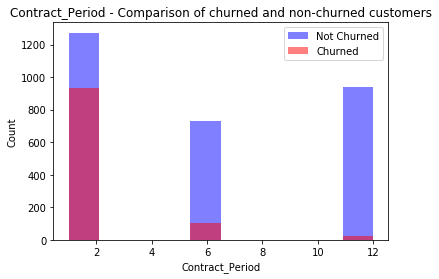

In [23]:
plot_graph(churn, no_churn, 'contract_period')

In the "promo_friends" distribution, it is noticeable that customers with short contracts churn particularly frequently and customers with long contracts particularly rarely.

In [24]:
plot_graph(churn, no_churn, 'group_visits')

The "group_visits" distribution is unequal. The churn rates for customers who have the property "group_visits = False" is high in proportion.

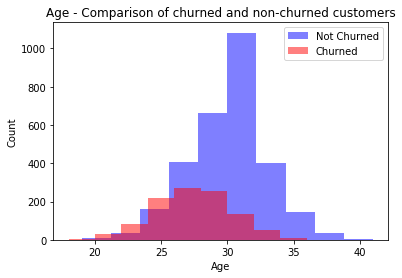

In [25]:
plot_graph(churn, no_churn, 'age')

In the "age" distribution, it is noticeable that young customers churn particularly frequently and old customers particularly rarely.

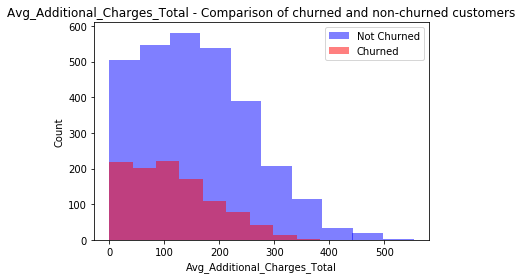

In [26]:
plot_graph(churn, no_churn, 'avg_additional_charges_total')

In the "promo_friends" distribution, it is noticeable that customers with low additional charges churn particularly frequently and customers with low additional charges churn rarely.

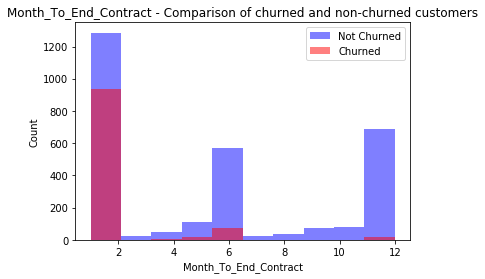

In [27]:
plot_graph(churn, no_churn, 'month_to_end_contract')

In the "month_to_end_contract" distribution, it is noticeable that customers with contracts ending in few months churn particularly frequently.

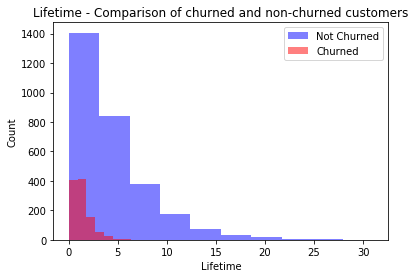

In [28]:
plot_graph(churn, no_churn, 'lifetime')

In the "lifetime" distribution, it is noticeable that customers with a low contract lifetime churn particularly frequently and customers with a high contract lifetime charges churn rarely.

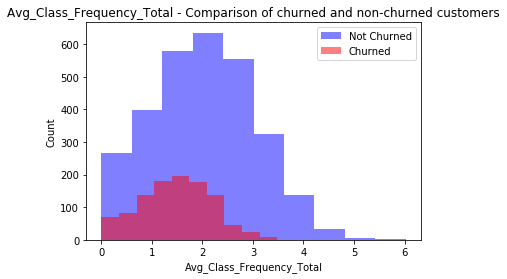

In [29]:
plot_graph(churn, no_churn, 'avg_class_frequency_total')

The "avg_class_frequency_total" distribution shows that the churn rates are relatively very similar regardless of the value in the "avg_class_frequency_total" column.

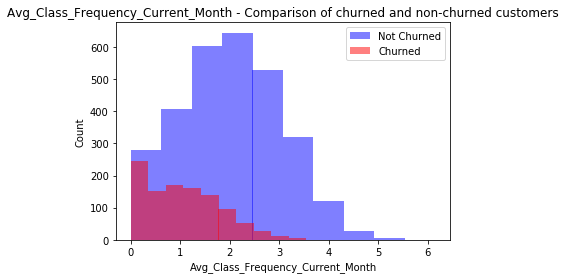

In [30]:
plot_graph(churn, no_churn, 'avg_class_frequency_current_month')

In the "avg_class_frequency_current_month" distribution, it is noticeable that customers with a high value in the "avg_class_frequency_current_month" column churn particularly rarely.

#### Correlationmatrix

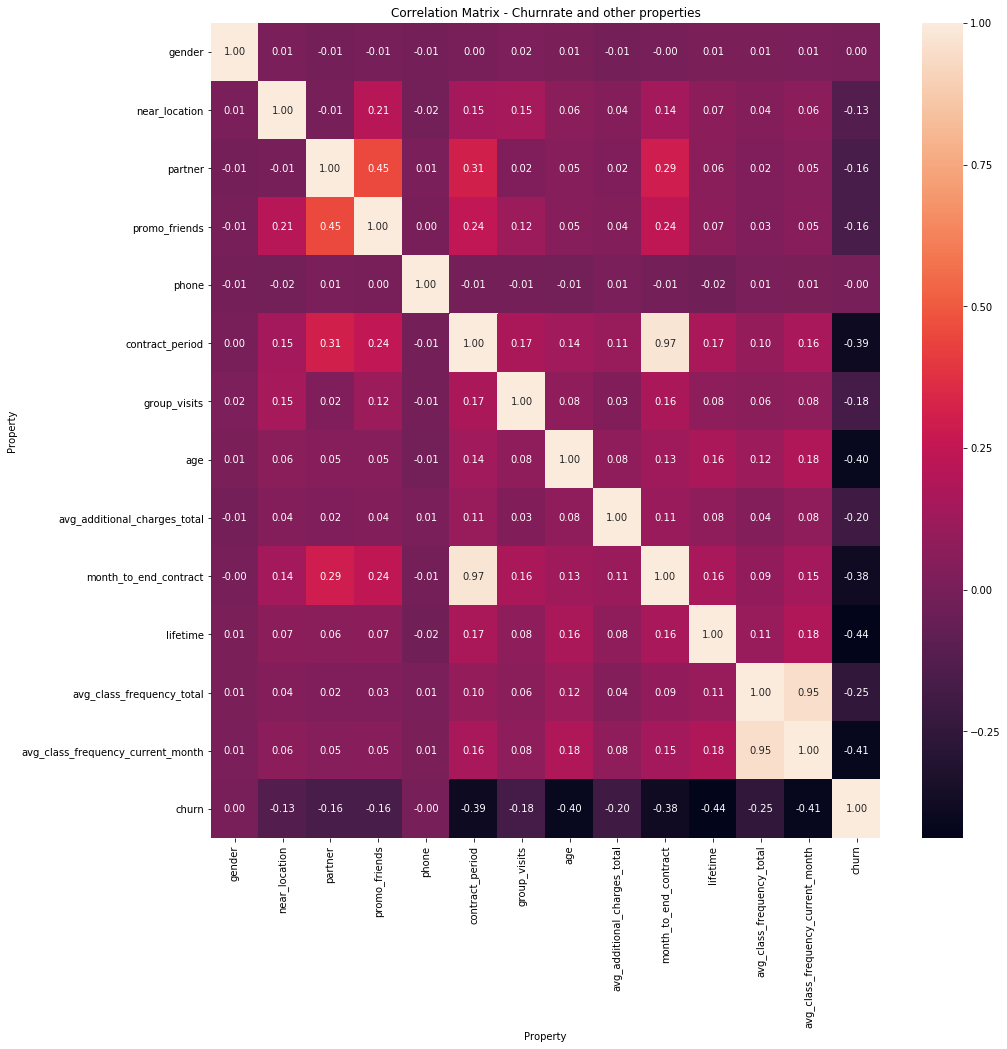

In [31]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
dataplot=sb.heatmap(data.corr(), annot=True, fmt='.2f')
plt.xlabel('Property')
plt.ylabel('Property')
plt.title('Correlation Matrix - Churnrate and other properties')

# displaying heatmap
plt.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> I like this heatmap, but again - don't forget about titles.
</div>

<div class="alert alert-info"> <b>Student's comment v. 1: </b>I added them :)</div>


<div class="alert alert-success">
<b>Reviewer's comment v2:</b> 👍
</div>

In the "churn" column you can see that properties with a particularly dark color (black) correlate especially strongly with "churn".

### Conclusion

In this part we found out, which properties may have an influence on the churn rate. We also learned a lot about the distribution of these properties among customers who churned and didn't churn.
From the above graphs and correlation matrix, the following columns are particularly correlated with churn rate:

    - lifetime: Customers with a short contract term tend to churn more often
    - avg_class_frequency_current_month: Customers with a low training frequency in the current month tend to churn more often
    - age: younger customers tend to churn more often
    - contract_period: Customers with a short contract_period tend to churn more often
    - month_to_end_contract: Customers with only a few months left until the end of the contract tend to churn more often
    
These columns are therefore looked at particularly closely.    

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Yes, linear models strongly dislike multicorrelated feature, because when the matrix is invertible, these numbers begin to tend to infinity.
Check this link:<br>
    <a>https://towardsdatascience.com/multicollinearity-why-is-it-a-problem-398b010b77ac</a>
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, expand this part.
</div>


<div class="alert alert-info"> <b>Student's comment v. 1: </b>I expanded it.</div>


## Building a model to predict user churn

In this step, the two models "Logistic Regression" and "Random Forest" will be applied to calculate the bounce rate. By outputting the values Accuracy, Precision and Recall by the newly created method print_all_metrics(), both models can be compared and the model with better results can be selected.

### Training the model

In [32]:
# look at the ratio between the dataset classes
print('The ratio between classes:\n', data['churn'].value_counts())


# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']
 
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
 

The ratio between classes:
 0    2939
1    1061
Name: churn, dtype: int64


<div class="alert alert-warning">
<s><b>Reviewer's comment: </b> Let's talk a little bit about data splitting. Since the labels of the target variable are not balanced, it is important to keep them in proportion in the training and test samples. To do this, <b>stratification splitting</b> is used. This keeps the proportionality in the subsamples, and your model will validate more correctly. To do this, just pass inside the function <code>train_test_split</code> parameter <code>stratify=y</code>. You can read more here: <br>.
 <a>https://towardsdatascience.com/the-magic-of-stratification-in-data-analysis-f1ee4800a283</a>  
</div>

<div class="alert alert-info"> <b>Student's comment v. 1: </b>I applied your recommendation.</div>


---

<div class="alert alert-warning">
<b>Reviewer's comment: </b> It is also recommended to scale the data for better model convergence. For this you can use StandardScaler: <a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a> <br>
And here is a comparison of different ways of scaling features and a little theory explanation: <a>https://www.machinelearningmastery.ru/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/</a>
</div>

<div class="alert alert-info"> <b>Student's comment v. 1: </b>In this case I am not sure how to apply the Scaler correctly.</div>


<div class="alert alert-warning">
<b>Reviewer's comment v2:</b> Like you do it in the random forest case.
</div>


<img src="https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png" width=600 />

In [33]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

### Logistic Regression

In [34]:
# define the model's algorithm
model = LogisticRegression()
 
# train your model
model.fit(X_train, y_train)
 
# use the trained model to make forecasts
probabilities = model.predict_proba(X_test)[:,1]
 
# binary prediction
predictions = model.predict(X_test)
 
# print all studied metrics for the resulting prediction
print_all_metrics(y_test, predictions, probabilities, title = 'Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



### Random Forest

In [35]:
# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)
 
# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the algorithm for the new random forest model
rf_model = RandomForestClassifier()
# train the random forest model
 
rf_model.fit(X_train_st, y_train)
 
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)  # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here
 
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')
 
 

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.79


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### Conclusion

In [36]:
print_all_metrics(y_test, predictions, probabilities, title = 'Metrics for logistic regression:')
print('--------------------------------')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.83
--------------------------------
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.79


The Random Forest model performed better in all metrics. This model is therefore to be preferred.

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Well done! You can improve this part with a confusion matrix analysis:<br>
            <a>https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62</a><br>
            <a>https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea</a>
</div>

## Creating user clusters

In this step user clusters will be created. First with the help of a dendogram, the ideal number of clusters is to be determined. The model will be trained with the K-means algorithm to predict customer clusters. 
After the subdivision into the clusters, the churn rates and other characteristics are compared with each other. Clusters with a high churn probability are to be determined. Then the distributions are drawn with the data grouped by clusters.

### Creating a dendogram to determine the number of clusters

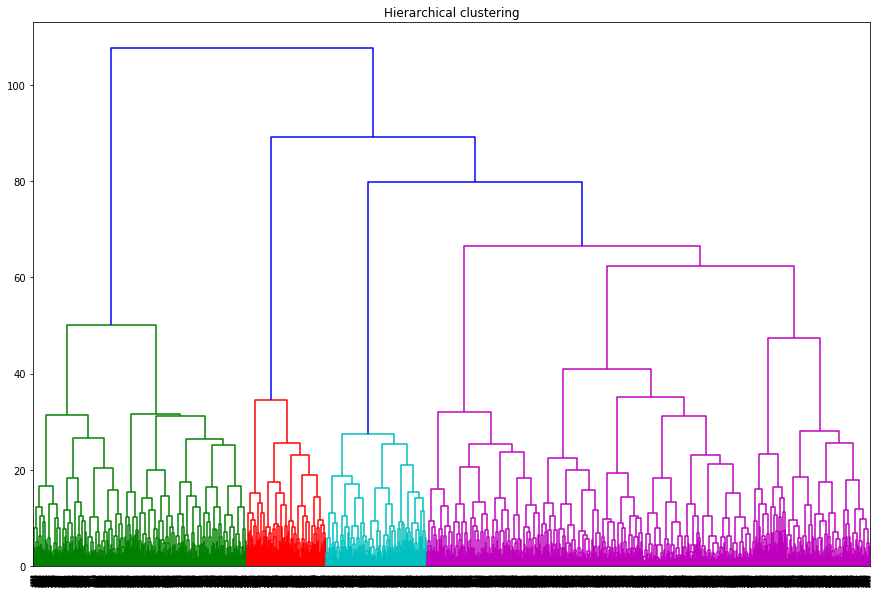

In [37]:
X= data.drop('churn', axis=1)
y= data['churn']
 
# standardize the data
scaler = StandardScaler()
x_sc = scaler.fit_transform(X) 
 
# linkage()
linked = linkage(x_sc, method = 'ward')
    
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show()     

Using the above model, it was found that the dataset should ideally be divided into 4 clusters.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> In general, the choice of the number of clusters is quite tricky, and in the next projects silhouette analysis can help you in solving this issue. As usual - link: <br> <a>https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py</a>
</div>


### Deviding the data into clusters

In [38]:
# define the k_means model with 4 clusters
km = KMeans(n_clusters = 4)
 
# predict the clusters for observations
labels = km.fit_predict(x_sc)
 
# store cluster labels in the field of our dataset
data['cluster_km'] = labels
 
# get the statistics of the mean feature values per cluster
data_grouped = data.groupby('cluster_km').mean().reset_index()
 
# print the grouped clusters
data_grouped

cluster_km    gender  near_location   partner  promo_friends  phone  \
0           0  0.523316       0.862694  0.471503       0.305699    0.0   
1           1  0.488606       0.757373  0.380027       0.189678    1.0   
2           2  0.502321       0.940576  0.777159       0.571031    1.0   
3           3  0.544498       0.866029  0.345455       0.208612    1.0   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         4.777202      0.427461  29.297927                       144.250   
1         1.890080      0.290214  28.063003                       129.250   
2        10.707521      0.535747  29.899721                       161.125   
3         2.420096      0.453589  30.005742                       158.625   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               4.464844  3.940415                   1.854492   
1               1.795898  2.237265                   1.216797   
2               9.781250  4.720520                   1.977539   
3               2.253906  4.742584                   2.732422   

   avg_class_frequency_current_month     churn  
0                           1.723633  0.266839  
1                           0.963379  0.558981  
2                           1.968750  0.029712  
3                           2.722656  0.088038

In [39]:
# get the statistics of the mean feature values per cluster
data_grouped = data.groupby('cluster_km').mean().reset_index()
 
# print the grouped clusters
data_grouped

cluster_km    gender  near_location   partner  promo_friends  phone  \
0           0  0.523316       0.862694  0.471503       0.305699    0.0   
1           1  0.488606       0.757373  0.380027       0.189678    1.0   
2           2  0.502321       0.940576  0.777159       0.571031    1.0   
3           3  0.544498       0.866029  0.345455       0.208612    1.0   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         4.777202      0.427461  29.297927                       144.250   
1         1.890080      0.290214  28.063003                       129.250   
2        10.707521      0.535747  29.899721                       161.125   
3         2.420096      0.453589  30.005742                       158.625   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               4.464844  3.940415                   1.854492   
1               1.795898  2.237265                   1.216797   
2               9.781250  4.720520                   1.977539   
3               2.253906  4.742584                   2.732422   

   avg_class_frequency_current_month     churn  
0                           1.723633  0.266839  
1                           0.963379  0.558981  
2                           1.968750  0.029712  
3                           2.722656  0.088038

The dataset is divided into 4 clusters. Grouping the data by clusters allows decisive properties to be determined.

Cluster 1 has the highest churn rate (56%). In this cluster, customers have the following characteristics:

    - short contract period
    - few group visits
    - somewhat younger than average
    - few additional purchases
    - few months until end of contract
    - short total contract period
    - low frequency of attendance
    
This is very much in line with previous analyses.    

### Plotting Scatterplotts of all clusters and their properties

The method show_clusters_on_plot() creates scatterplots that show the distribution of the properties in the individual clusters.

In [40]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(data, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sb.scatterplot(data[x_name], data[y_name],
          hue = data[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

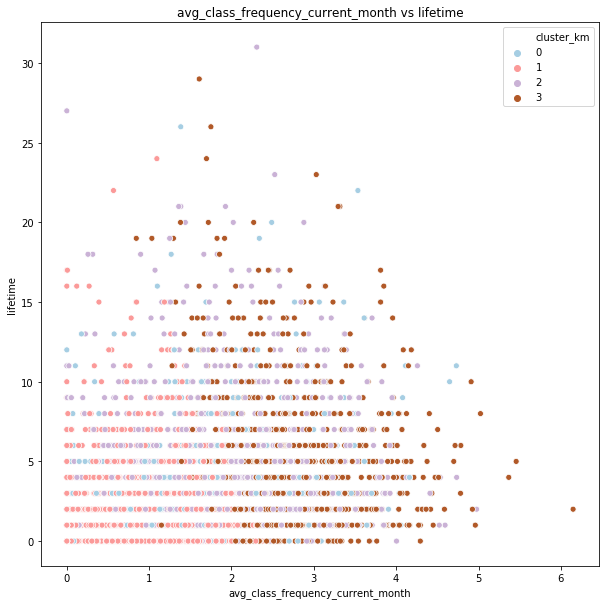

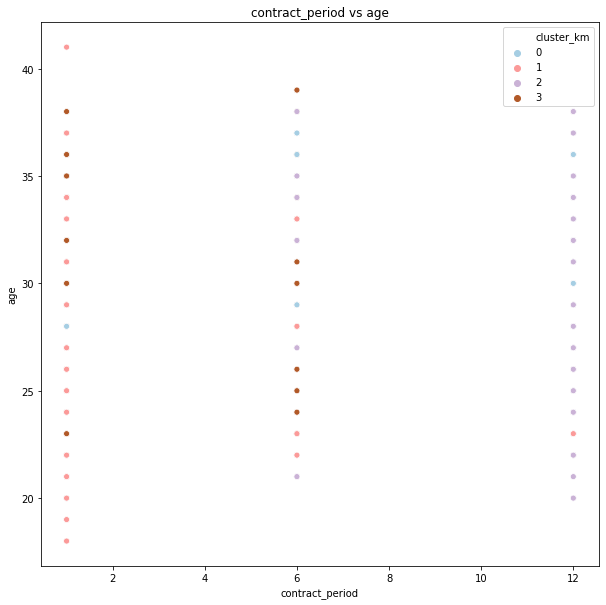

In [41]:
show_clusters_on_plot(data=data, 
                      y_name='lifetime',
                      x_name='avg_class_frequency_current_month', 
                      cluster_name='cluster_km')

show_clusters_on_plot(data=data, 
                      y_name='age',
                      x_name='contract_period', 
                      cluster_name='cluster_km')


The above scatterplots show that the properties influencing the churn rate in cluster 1 are spatially very differentiated in the plot.

The distribution of the properties within the clusters will now be shown graphically for the 5 most important properties.

In [42]:
def plot_distribution(data, col):
 
    fig = plt.figure(figsize=(10,6))
    
    sb.distplot(data[data['cluster_km'] == 0][col])    
    sb.distplot(data[data['cluster_km'] ==  1][col])
    sb.distplot(data[data['cluster_km'] ==  2][col])

    sb.distplot(data[data['cluster_km'] ==  3][col])
    sb.distplot(data[data['cluster_km'] ==  4][col])
    
    plt.xlabel(col)
    plt.ylabel('Density')





<div class="alert alert-info"> <b>Student's comment v. 0: </b>Unfortunately I couldn't find out how to get a legend on this way... May you colud give me a hint?</div>

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Sure, you can achive it with plt.legend(). Also, we can optimize the code through groupby:
</div>


In [55]:
def plot_distribution_updated(data, col):
 
    fig = plt.figure(figsize=(10,6))
    plot_data = data.groupby('cluster_km')[col].apply(sb.distplot)
    
    plt.xlabel(col.capitalize())
    plt.ylabel('Density')
    plt.title('Distribution of the property - ' + col.capitalize())
    plt.legend(labels=data['cluster_km'].unique())


<div class="alert alert-info"> <b>Student's comment v. 1: </b>Thank you for the help!</div>


<div class="alert alert-success">
<b>Reviewer's comment v2:</b> 🤘
</div>

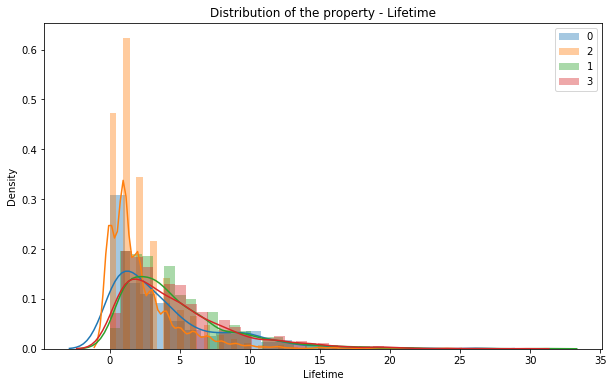

In [56]:
plot_distribution_updated(data, 'lifetime')

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> The same title problem below.
</div>

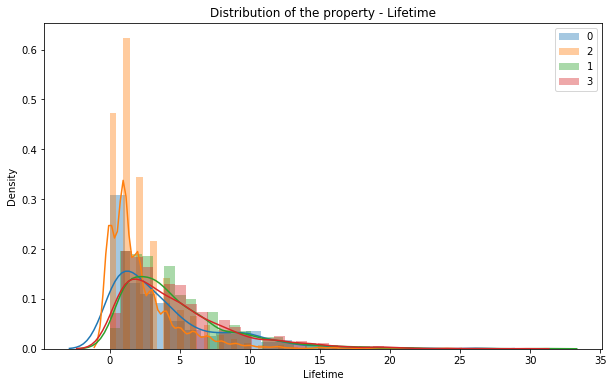

In [57]:
plot_distribution_updated(data, 'lifetime')

Most customers from cluster 1 have a contract age of 1 month. This could mean that many of those affected have taken a trial month and do not make up a new contract after this.

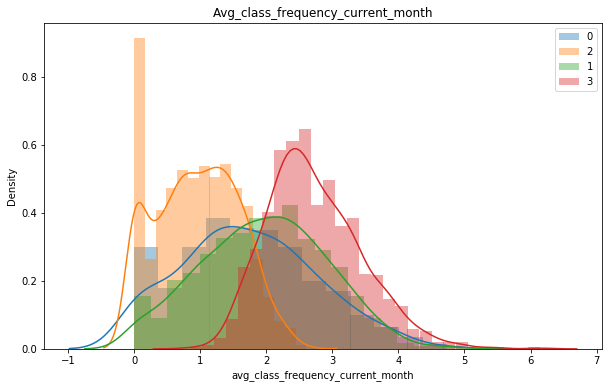

In [51]:
plot_distribution_updated(data, 'avg_class_frequency_current_month')

Clients from cluster 1 went to the gym much less on average (0-2 times). The basic motivation for regular training is therefore not so great in this cluster.

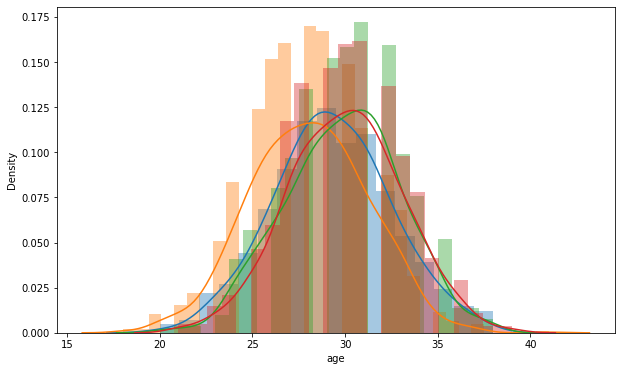

In [47]:
plot_distribution(data, 'age')

As mentioned earlier, cluster! customers are a little longer than customers from other clusters. Among younger customers, saving money could possibly play a more important role.

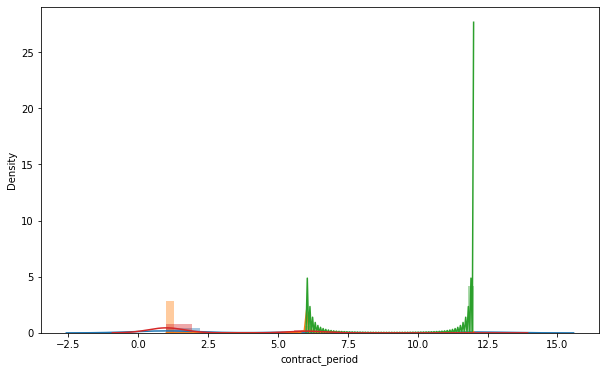

In [48]:
plot_distribution_updated(data, 'contract_period')

Customers from cluster 1 mostly have a contract period of 1 month. This could confirm the assumption already made that many from this cluster have only signed a trial month.

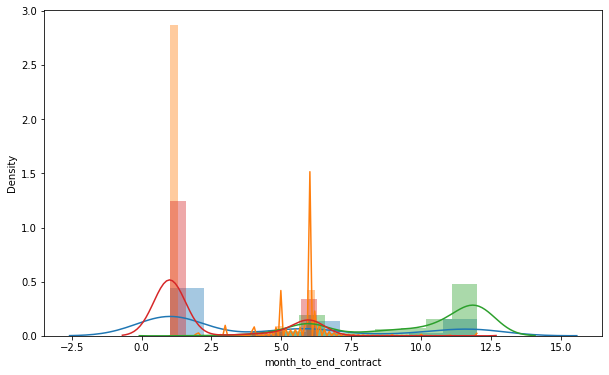

In [49]:
plot_distribution_updated(data, 'month_to_end_contract')

The duration until the end of the contract is usually one month for customers from cluster 1. This could also be due to the trial month.

### Conclusion

It was found that the top 5 characteristics that indicate a customer is about to churn are as follows: 

    - lifetime
    - avg_class_frequency_current_month
    - age
    - contract_period
    - month_to_end_contract
    
The main differences between the clusters are:

    - Cluster 1 has the highest (0.56) and Cluster 0 the second highest churn rate (0.27)
    - Cluster 2 and 3 have a very low churn rate (0.03, 0.09)
    - For cluster 2 it's characteristic, that the customers have long contract peroid and lifetimes
    - Cluster 3 has a relative short contract period but the training frequency is very high compared to the other clusters
    
From the above distribution graphs, it was assumed that many exiting customers have signed a trial month, which they used only a few times due to lack of interest in regular training. After the expiration of the trial month, no new contract was signed.     
    

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Okay, but what the main differences between clusters? 
</div>

In [58]:
data_grouped

cluster_km    gender  near_location   partner  promo_friends  phone  \
0           0  0.523316       0.862694  0.471503       0.305699    0.0   
1           1  0.488606       0.757373  0.380027       0.189678    1.0   
2           2  0.502321       0.940576  0.777159       0.571031    1.0   
3           3  0.544498       0.866029  0.345455       0.208612    1.0   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         4.777202      0.427461  29.297927                       144.250   
1         1.890080      0.290214  28.063003                       129.250   
2        10.707521      0.535747  29.899721                       161.125   
3         2.420096      0.453589  30.005742                       158.625   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               4.464844  3.940415                   1.854492   
1               1.795898  2.237265                   1.216797   
2               9.781250  4.720520                   1.977539   
3               2.253906  4.742584                   2.732422   

   avg_class_frequency_current_month     churn  
0                           1.723633  0.266839  
1                           0.963379  0.558981  
2                           1.968750  0.029712  
3                           2.722656  0.088038

## Conclusion



The main goal of this project was to find out the most important characteristics of customers that are associated with a high churn rate. Customer characteristics that are associated with a high churn rate are the following:

    - low contract age
    - low frequency of visits
    - young age
    - short total contract duration
    - few months until end of contract

Some of these characteristics suggest that many of the customers are only bound to a trial month and do not make up a new contract after its expiration. These customers belong to cluster 1, which has a churn rate of 0.56. Measures should therefore be taken to make the trial month in particular more attractive for customers and to increase their motivation to train regularly. One possibility would be, for example, a one-off voucher for an accompanied training session or free drinks.
Customers from clusters 2 and 3, on the other hand, have a very low churn rate. Customers from this cluster either have long contracts or go to the training frequently. So it would be a good strategy to bind customers to long contracts, e.g. with low monthly fees for the first 3 months. If this is also used to get customers used to regular training, it could encourage a long-term customer relationship.

To predict the churn probability of customers, the "Random Forest" model proved to be the most successful. An accuracy of 92% was achieved in predicting whether a customer would leave the gym. 


<div class="alert alert-info"> <b>Student's comment v. 0: </b>I have not yet formulated the overall conclusion, as I wanted to wait for feedback on the results so far. In the next iteration, I would like to add to this and also further improve and formulate previous conclusions.</div>


<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Okay.
</div>